In [36]:
#Dependencies
import requests
import json
import gmaps
import time
import gmaps.datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from us import states

from yelpapi import get_my_key
from gkey import gkey

In [37]:
#Define all the pathways
population_csv_path = "../Project1/Population_by_Zip.csv"

business_id = "e1zDuraqPYNqfEmgXJJAyQ"
ENDPORINT = "https://api.yelp.com/v3/businesses/search"
HEADERS = {'Authorization': 'bearer %s' % get_my_key}

In [38]:
#API parameters for Yelp Api


PARAMETERS = {"term": "coffee", "limit": 50, "offset":150, "radius": 5000, "location": "Chicago"} 
response = requests.get(url = ENDPORINT, params= PARAMETERS, headers=HEADERS)
business_data = response.json()

len(business_data["businesses"])

50

In [39]:
#Pick up the columns we care
good_coffee = business_data["businesses"]
good_coffee_df = pd.DataFrame(good_coffee)
good_coffee_df = good_coffee_df[["name","is_closed","categories","review_count","rating","location", "coordinates"]]
good_coffee_df.head()

,name,is_closed,categories,review_count,rating,location,coordinates
0,Vanille Patisserie,False,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",229,4.5,"{'address1': '2108 N Clark St', 'address2': ''...","{'latitude': 41.920406577296, 'longitude': -87..."
1,The Bakery at Fat Rice,False,"[{'alias': 'bakeries', 'title': 'Bakeries'}]",62,4.0,"{'address1': '2951 W Diversey Ave', 'address2'...","{'latitude': 41.9319451, 'longitude': -87.7017..."
2,Caffè RōM,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",162,4.0,"{'address1': '71 S Franklin St', 'address2': '...","{'latitude': 41.8808728191302, 'longitude': -8..."
3,etta,False,"[{'alias': 'newamerican', 'title': 'American (...",269,4.5,"{'address1': '1840 W North Ave', 'address2': N...","{'latitude': 41.91073, 'longitude': -87.67417}"
4,Same Day Cafe,False,"[{'alias': 'desserts', 'title': 'Desserts'}, {...",174,4.5,"{'address1': '2651 N Kedzie Ave', 'address2': ...","{'latitude': 41.9297214, 'longitude': -87.7073..."


In [40]:
#Give a requirement on how to define a good coffee shop
great_coffee_shop = good_coffee_df.loc[(good_coffee_df["review_count"]>10) & 
                                       ( good_coffee_df["rating"] >=4.0)]

#How many coffee shops we have
num_coffee_shop = great_coffee_shop['name'].count()
num_coffee_shop

35

In [41]:
zip_list = []
lat_list = []
lng_list = []

for i in range(0, num_coffee_shop):
    
    temp_zip = great_coffee_shop["location"].iloc[i]["zip_code"]
    zip_list.append(temp_zip)
    
    temp_lat = great_coffee_shop["coordinates"].iloc[i]["latitude"]
    lat_list.append(temp_lat)
    
    temp_lng = great_coffee_shop["coordinates"].iloc[i]["longitude"]
    lng_list.append(temp_lng)    
    
#Re-organize the dataframe
great_coffee_shop['zip_code'] = zip_list
great_coffee_shop['latitude'] = lat_list
great_coffee_shop['longitude'] = lng_list

great_coffee_shop

/Users/katelynburke/anaconda3/envs/PythonData2/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/katelynburke/anaconda3/envs/PythonData2/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/katelynburke/anaconda3/envs/PythonData2/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,name,is_closed,categories,review_count,rating,location,coordinates,zip_code,latitude,longitude
0,Vanille Patisserie,False,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",229,4.5,"{'address1': '2108 N Clark St', 'address2': ''...","{'latitude': 41.920406577296, 'longitude': -87...",60614,41.920407,-87.637371
1,The Bakery at Fat Rice,False,"[{'alias': 'bakeries', 'title': 'Bakeries'}]",62,4.0,"{'address1': '2951 W Diversey Ave', 'address2'...","{'latitude': 41.9319451, 'longitude': -87.7017...",60647,41.931945,-87.701734
2,Caffè RōM,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",162,4.0,"{'address1': '71 S Franklin St', 'address2': '...","{'latitude': 41.8808728191302, 'longitude': -8...",60606,41.880873,-87.636395
3,etta,False,"[{'alias': 'newamerican', 'title': 'American (...",269,4.5,"{'address1': '1840 W North Ave', 'address2': N...","{'latitude': 41.91073, 'longitude': -87.67417}",60622,41.910730,-87.674170
4,Same Day Cafe,False,"[{'alias': 'desserts', 'title': 'Desserts'}, {...",174,4.5,"{'address1': '2651 N Kedzie Ave', 'address2': ...","{'latitude': 41.9297214, 'longitude': -87.7073...",60647,41.929721,-87.707345
5,Flo,False,"[{'alias': 'breakfast_brunch', 'title': 'Break...",922,4.0,"{'address1': '1434 W Chicago Ave', 'address2':...","{'latitude': 41.8963899, 'longitude': -87.66383}",60642,41.896390,-87.663830
6,Cherubs,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",61,4.0,"{'address1': '2524 W Fullerton Ave', 'address2...","{'latitude': 41.92519, 'longitude': -87.6911499}",60647,41.925190,-87.691150
9,Peet's Coffee,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",186,4.0,"{'address1': '1000 W North Ave', 'address2': '...","{'latitude': 41.9111559756949, 'longitude': -8...",60622,41.911156,-87.653766
10,M2 Cafe,False,"[{'alias': 'cafes', 'title': 'Cafes'}, {'alias...",81,4.0,"{'address1': '850 W Jackson', 'address2': '', ...","{'latitude': 41.878154, 'longitude': -87.649269}",60607,41.878154,-87.649269
13,Iguana Café,False,"[{'alias': 'creperies', 'title': 'Creperies'},...",696,4.0,"{'address1': '517 N Halsted St', 'address2': '...","{'latitude': 41.8917655944824, 'longitude': -8...",60642,41.891766,-87.647430


In [42]:
great_coffee_shop.zip_code.dtype
# need to change the data type of Zipcode to integer (int64)

dtype('O')

In [43]:
great_coffee_shop['zip_code'] = great_coffee_shop['zip_code'].apply(pd.to_numeric)
print(great_coffee_shop.dtypes)

#great_coffee_[['A', 'C']] = df[['A', 'C']].apply(pd.to_numeric) 
#print(df.dtypes) 

name             object
is_closed          bool
categories       object
review_count      int64
rating          float64
location         object
coordinates      object
zip_code          int64
latitude        float64
longitude       float64
dtype: object


/Users/katelynburke/anaconda3/envs/PythonData2/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
#Group by zip_code
great_coffee_by_zip = great_coffee_shop.groupby('zip_code')
num_coffee_by_zip = great_coffee_by_zip['name'].count()

great_coffee_by_zip_df = pd.DataFrame(num_coffee_by_zip)
great_coffee_by_zip_df = great_coffee_by_zip_df.rename(columns={"name":"Number of Coffee Shop"})
great_coffee_by_zip_df.sort_values(by = "Number of Coffee Shop",ascending=False, inplace=True)

great_coffee_by_zip_df

,Number of Coffee Shop
zip_code,
60622,8
60647,7
60657,5
60614,3
60642,3
60654,3
60606,2
60607,2
60609,1


In [45]:
# Configure the map
gmaps.configure(api_key = gkey)

locations = great_coffee_shop[["latitude", "longitude"]].astype(float)
locations.head()

,latitude,longitude
0,41.920407,-87.637371
1,41.931945,-87.701734
2,41.880873,-87.636395
3,41.910730,-87.674170
4,41.929721,-87.707345


In [46]:
coffee_shop_layer = gmaps.symbol_layer(locations, 
                                       fill_color='rgba(0, 150, 0, 0.4)',
                                       stroke_color='rgba(0, 0, 150, 0.4)', 
                                       scale=3)

fig = gmaps.figure()

fig.add_layer(coffee_shop_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [47]:
#Read data from csv for Zip Code and Population Data
pop_by_zip_df = pd.read_csv(population_csv_path)
pop_by_zip_df.head()

,Zip Code ZCTA,2010 Census Population
0,1001,16769
1,1002,29049
2,1003,10372
3,1005,5079
4,1007,14649


In [48]:
# Same number of values in both rows
# Both columns are made up of integers
pop_by_zip_df.count()

Zip Code ZCTA             33092
2010 Census Population    33092
dtype: int64

In [49]:
# Chicago Zipcodes range from 60007 - 60827
chicago = pop_by_zip_df.loc[pop_by_zip_df['Zip Code ZCTA'] == 60603]
chicago

,Zip Code ZCTA,2010 Census Population
20615,60603,493


In [50]:
# Pull Chicago Zip Codes and population of Chicago Zip Codes
chicago_zip = pop_by_zip_df.loc[(pop_by_zip_df['Zip Code ZCTA'] >= 60007) & (pop_by_zip_df['Zip Code ZCTA'] <= 60827)]

chicago_pop_df = chicago_zip.rename(columns={"Zip Code ZCTA":"zip_code", 
                                               "2010 Census Population":"Population in 2010"})
chicago_pop_df.reset_index(drop=True).head()

,zip_code,Population in 2010
0,60007,33820
1,60008,22717
2,60010,44095
3,60012,11120
4,60013,26872


In [51]:
chicago_pop_df.count()

zip_code              337
Population in 2010    337
dtype: int64

In [52]:
# Zip Code and coordinating Latitude and Longitude Data
lat_long_csv = "../Project1/KB_US_Zip_Codes.csv"
zip_lat_long_df = pd.read_csv(lat_long_csv)
#zip_lat_long_df.head()

In [53]:
# Pull Chicago Zip Codes with coordinating Latitudes and Longitudes 
chicago_lat_long = zip_lat_long_df.loc[(zip_lat_long_df['ZIP'] >= 60007) & (zip_lat_long_df['ZIP'] <= 60827)]
chicago_lat_long.reset_index(drop=True).head()

,ZIP,LAT,LNG
0,60007,42.008600,-87.997340
1,60008,42.069786,-88.016221
2,60010,42.146494,-88.164651
3,60012,42.272492,-88.314084
4,60013,42.223439,-88.235506


In [54]:
# chicago_lat_long.reset_index(drop=True).head()

In [55]:
# Change column titles 
chicago_latlong = chicago_lat_long.rename(columns={"ZIP":"zip_code", 
                                               "LAT":"Latitude", "LNG":"Longitude"})
chicago_latlong.head()

,zip_code,Latitude,Longitude
20432,60007,42.008600,-87.997340
20433,60008,42.069786,-88.016221
20434,60010,42.146494,-88.164651
20435,60012,42.272492,-88.314084
20436,60013,42.223439,-88.235506


In [56]:
# Merge population and lat/lng data frames
zip_pop_merge = pd.merge(chicago_latlong, chicago_pop_df, on="zip_code")
zip_pop_merge.head()

,zip_code,Latitude,Longitude,Population in 2010
0,60007,42.008600,-87.997340,33820
1,60008,42.069786,-88.016221,22717
2,60010,42.146494,-88.164651,44095
3,60012,42.272492,-88.314084,11120
4,60013,42.223439,-88.235506,26872


In [57]:
zip_pop_merge.zip_code.dtype

dtype('int64')

In [58]:
# Merge Population and Yelp Data into one Data Frame
merged_coffee_pop = pd.merge(chicago_pop_df, great_coffee_shop, on="zip_code")
merged_coffee_pop

,zip_code,Population in 2010,name,is_closed,categories,review_count,rating,location,coordinates,latitude,longitude
0,60606,2308,Caffè RōM,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",162,4.0,"{'address1': '71 S Franklin St', 'address2': '...","{'latitude': 41.8808728191302, 'longitude': -8...",41.880873,-87.636395
1,60606,2308,Doughnut Vault Canal,False,"[{'alias': 'donuts', 'title': 'Donuts'}, {'ali...",86,4.0,"{'address1': '111 N Canal St', 'address2': '',...","{'latitude': 41.8840430473447, 'longitude': -8...",41.884043,-87.639269
2,60607,23897,M2 Cafe,False,"[{'alias': 'cafes', 'title': 'Cafes'}, {'alias...",81,4.0,"{'address1': '850 W Jackson', 'address2': '', ...","{'latitude': 41.878154, 'longitude': -87.649269}",41.878154,-87.649269
3,60607,23897,Morgan Street Cafe,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",183,4.0,"{'address1': '111 S Morgan St', 'address2': ''...","{'latitude': 41.8796768188477, 'longitude': -8...",41.879677,-87.651627
4,60609,64906,8a5e,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",11,4.5,"{'address1': '1200 W 35th St', 'address2': Non...","{'latitude': 41.8312, 'longitude': -87.65658}",41.831200,-87.656580
5,60614,66617,Vanille Patisserie,False,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",229,4.5,"{'address1': '2108 N Clark St', 'address2': ''...","{'latitude': 41.920406577296, 'longitude': -87...",41.920407,-87.637371
6,60614,66617,Cafe Vienna,False,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",620,4.0,"{'address1': '2523 N Clark St', 'address2': ''...","{'latitude': 41.928489, 'longitude': -87.642033}",41.928489,-87.642033
7,60614,66617,Blue Door Farm Stand,False,"[{'alias': 'salad', 'title': 'Salad'}, {'alias...",380,4.0,"{'address1': '2010 N Halsted St', 'address2': ...","{'latitude': 41.9185554983396, 'longitude': -8...",41.918555,-87.648811
8,60618,92084,Cafe Tola,False,"[{'alias': 'empanadas', 'title': 'Empanadas'},...",157,4.0,"{'address1': '3324 N California Ave', 'address...","{'latitude': 41.942657, 'longitude': -87.698182}",41.942657,-87.698182
9,60622,52548,etta,False,"[{'alias': 'newamerican', 'title': 'American (...",269,4.5,"{'address1': '1840 W North Ave', 'address2': N...","{'latitude': 41.91073, 'longitude': -87.67417}",41.910730,-87.674170


In [59]:
locations2 = zip_pop_merge[["Latitude", "Longitude"]].astype(float)
population = zip_pop_merge["Population in 2010"].astype(float)

factor = 1500

population_fix = [round(x/factor,2) for x in population]
population_fix

[22.55,
 15.14,
 29.4,
 7.41,
 17.91,
 32.37,
 17.87,
 39.79,
 20.07,
 6.55,
 3.7,
 5.44,
 26.07,
 8.89,
 0.32,
 24.04,
 25.3,
 9.28,
 1.36,
 19.84,
 3.62,
 6.17,
 5.7,
 1.68,
 6.53,
 13.95,
 23.41,
 27.78,
 19.4,
 21.08,
 16.79,
 15.51,
 36.81,
 24.79,
 17.17,
 26.62,
 10.27,
 25.72,
 24.98,
 5.59,
 10.67,
 2.4,
 0.62,
 40.0,
 25.99,
 22.28,
 17.88,
 6.72,
 6.56,
 11.18,
 47.81,
 17.99,
 10.51,
 27.69,
 25.09,
 18.01,
 13.05,
 4.6,
 7.5,
 21.49,
 20.74,
 26.08,
 21.46,
 27.95,
 12.69,
 13.54,
 26.62,
 15.16,
 0.37,
 25.7,
 0.17,
 3.04,
 0.22,
 30.85,
 10.57,
 6.91,
 33.97,
 31.6,
 12.62,
 30.91,
 0.16,
 9.44,
 12.06,
 25.4,
 19.04,
 4.83,
 4.68,
 25.2,
 22.92,
 9.56,
 0.15,
 17.63,
 6.91,
 0.04,
 1.75,
 1.81,
 34.31,
 1.2,
 2.71,
 8.36,
 16.07,
 11.18,
 5.28,
 19.32,
 1.59,
 16.95,
 5.41,
 3.47,
 14.7,
 3.3,
 22.56,
 6.83,
 16.36,
 8.14,
 20.5,
 17.04,
 7.86,
 15.11,
 14.56,
 1.13,
 19.22,
 1.63,
 24.35,
 19.34,
 28.44,
 20.31,
 7.11,
 9.54,
 10.9,
 26.13,
 13.18,
 3.18,
 28.75,
 20.9

In [60]:
fig2 = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations2, 
                                 weights=population_fix, 
                                 dissipating=False, 
                                 max_intensity=100, 
                                 point_radius=0.04)

heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 0.04

fig2.add_layer(heat_layer)

fig2

Figure(layout=FigureLayout(height='420px'))

In [61]:
fig3 = gmaps.figure()

fig3.add_layer(heat_layer)
fig3.add_layer(coffee_shop_layer)

fig3

Figure(layout=FigureLayout(height='420px'))

In [62]:
# Scatter/Bubble Plot of the Population of the Neighborhood (based on Zip Code) vs. 
# The Number of Yelp Reviews (per coffee shop)

# Each bubble is a Chicago Zip Code 
# Circle Size correlates with the population in that Zip Code 
# X-axis = total number of reviews in that zip code (sum of reviews in zip)
# Y-axis = average number of ratings in that zip code (mean/avg of raring in zip)

# population_bubble = merged_coffee_pop.loc[merged_coffee_pop["Population in 2010"]]

In [63]:
#yelp_review = merged_coffee_pop["review_count"].sum()
#yelp_rating = merged_coffee_pop["rating"].mean()

In [64]:
# Create and format scatter plot
# plt.scatter(yelp_review, yelp_rating, marker = "o", edgecolors = "black", facecolor = "coral", 
           # alpha = 0.75, linewidth = 1.0)

#plt.xlabel('Number of Reviews Per Coffee Shops')
#plt.ylabel('Average Rating (in Stars) of Coffee Shops')
# plt.title('Population of Chicago Neighborhood vs. Popularity of Coffee Shops (by Yelp Reviews and Ratings)')
# plt.text(42, 30, 'Note: Circle size correlates population of Chicago Neighborhood (by Zip Code)')

# plt.grid()

# # plt.legend(pyber_data_complete["type"].unique(), title="City Types")

# plt.show()

In [65]:
# Scatter Plot - Population of Neighborhood (by Zip Code) vs. Number of Reviews (from Yelp) - Visibility of Shop
yelp_reviews = merged_coffee_pop["review_count"]
by_population = merged_coffee_pop["Population in 2010"]

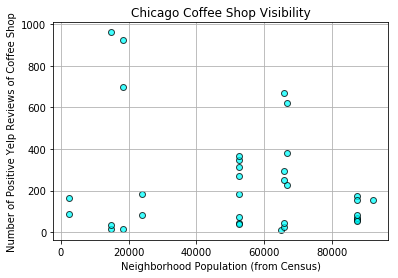

In [66]:
plt.scatter(by_population, yelp_reviews, marker = "o", edgecolors = "black", facecolor = "cyan", 
            alpha = 0.75, linewidth = 1.0)

plt.xlabel('Neighborhood Population (from Census)')
plt.ylabel('Number of Positive Yelp Reviews of Coffee Shop')
plt.title('Chicago Coffee Shop Visibility')

plt.grid()
# plt.savefig("../CoffeeShopVisibility.png")
plt.show()

In [68]:
# Review count per zip code - Bar Graph
great_coffee_shop

,name,is_closed,categories,review_count,rating,location,coordinates,zip_code,latitude,longitude
0,Vanille Patisserie,False,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",229,4.5,"{'address1': '2108 N Clark St', 'address2': ''...","{'latitude': 41.920406577296, 'longitude': -87...",60614,41.920407,-87.637371
1,The Bakery at Fat Rice,False,"[{'alias': 'bakeries', 'title': 'Bakeries'}]",62,4.0,"{'address1': '2951 W Diversey Ave', 'address2'...","{'latitude': 41.9319451, 'longitude': -87.7017...",60647,41.931945,-87.701734
2,Caffè RōM,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",162,4.0,"{'address1': '71 S Franklin St', 'address2': '...","{'latitude': 41.8808728191302, 'longitude': -8...",60606,41.880873,-87.636395
3,etta,False,"[{'alias': 'newamerican', 'title': 'American (...",269,4.5,"{'address1': '1840 W North Ave', 'address2': N...","{'latitude': 41.91073, 'longitude': -87.67417}",60622,41.910730,-87.674170
4,Same Day Cafe,False,"[{'alias': 'desserts', 'title': 'Desserts'}, {...",174,4.5,"{'address1': '2651 N Kedzie Ave', 'address2': ...","{'latitude': 41.9297214, 'longitude': -87.7073...",60647,41.929721,-87.707345
5,Flo,False,"[{'alias': 'breakfast_brunch', 'title': 'Break...",922,4.0,"{'address1': '1434 W Chicago Ave', 'address2':...","{'latitude': 41.8963899, 'longitude': -87.66383}",60642,41.896390,-87.663830
6,Cherubs,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",61,4.0,"{'address1': '2524 W Fullerton Ave', 'address2...","{'latitude': 41.92519, 'longitude': -87.6911499}",60647,41.925190,-87.691150
9,Peet's Coffee,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",186,4.0,"{'address1': '1000 W North Ave', 'address2': '...","{'latitude': 41.9111559756949, 'longitude': -8...",60622,41.911156,-87.653766
10,M2 Cafe,False,"[{'alias': 'cafes', 'title': 'Cafes'}, {'alias...",81,4.0,"{'address1': '850 W Jackson', 'address2': '', ...","{'latitude': 41.878154, 'longitude': -87.649269}",60607,41.878154,-87.649269
13,Iguana Café,False,"[{'alias': 'creperies', 'title': 'Creperies'},...",696,4.0,"{'address1': '517 N Halsted St', 'address2': '...","{'latitude': 41.8917655944824, 'longitude': -8...",60642,41.891766,-87.647430


In [83]:
zip_group = great_coffee_shop.groupby('zip_code')

In [84]:
review_group = zip_group['review_count'].sum()
review_group

zip_code
60606     248
60607     264
60609      11
60614    1229
60618     157
60622    1641
60642    1634
60647     654
60654    1011
60657    1282
Name: review_count, dtype: int64

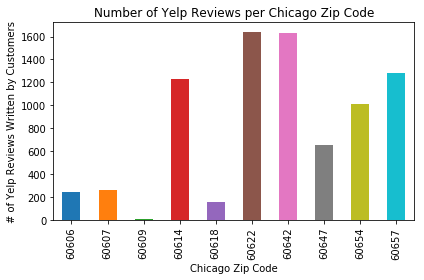

In [111]:
# Create a bar chart based off of the group series from before
review_count_chart = review_group.plot(kind='bar')

# Set the xlabel and ylabel
review_count_chart.set_title("Number of Yelp Reviews per Chicago Zip Code")
review_count_chart.set_xlabel("Chicago Zip Code")
review_count_chart.set_ylabel("# of Yelp Reviews Written by Customers")

# plt.savefig("../ReviewCounts.png")
plt.tight_layout()
plt.show()